In [65]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
plt.style.use('ggplot')

In [66]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s


def graph_it(ax, foreground, mode, run):
    s = sum_throughput(foreground)
    ax.plot(range(0, len(s['rate'])*6, 6), s['rate']/1000, 
            'r-', marker='x', linewidth=2.0, label="Sequencer 1")
    
    clients0 = ["cephfs-" + mode + "-" + run + "-issdm-24-throughput.csv",
                "cephfs-" + mode + "-" + run + "-issdm-27-throughput.csv",
                "cephfs-" + mode + "-" + run + "-issdm-40-throughput.csv",
                "cephfs-" + mode + "-" + run + "-issdm-20-throughput.csv"]
    clients2 = ["cephfs-" + mode + "-" + run + "-issdm-14-throughput.csv",
                "cephfs-" + mode + "-" + run + "-issdm-11-throughput.csv", 
                "cephfs-" + mode + "-" + run + "-issdm-0-throughput.csv", 
                "cephfs-" + mode + "-" + run + "-issdm-1-throughput.csv"]

    t = sum_throughput(clients0)
    ax.plot(range(0, len(t['rate'])*6, 6), t['rate']/1000, 
            'b-', marker='o', linewidth=2.0, label="Sequencer 2")
    
    u = sum_throughput(clients2)
    ax.plot(range(0, len(u['rate'])*6, 6), u['rate']/1000, 
            'g-', marker='v', linewidth=2.0, label="Sequencer 3")    

    ax.plot(range(0, len(t['rate'])*6, 6), (t['rate']+s['rate']+u['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Sum CephFS")
    
    # MANTLE RESULTS
    dir = "../results-mantle/"
    s1 = sum_throughput(glob.glob(dir+"test-foreground-*throughput.csv"))
    t1 = sum_throughput([dir+"test-issdm-14-throughput.csv", dir+"test-issdm-11-throughput.csv", dir+"test-issdm-0-throughput.csv", dir+"test-issdm-1-throughput.csv"])
    u1 = sum_throughput([dir+"test-issdm-24-throughput.csv", dir+"test-issdm-27-throughput.csv", dir+"test-issdm-40-throughput.csv", dir+"test-issdm-20-throughput.csv"])
    ax.plot(range(0, len(t1['rate'])*6, 6), (t1['rate']+s1['rate']+u1['rate'])/1000, 
        '--', color='purple', marker='x', markersize=10, linewidth=2.0, label="Sum Mantle ")    
    #ax.plot(range(0, len(t1['rate'])*6, 6), (t1['rate'])/1000, 
    #    '--', color='purple', linewidth=2.0, label="No Balancing: Sum of Sequencers")
    #ax.plot(range(0, len(u1['rate'])*6, 6), (u1['rate'])/1000, 
    #    '--', color='purple', linewidth=2.0, label="No Balancing: Sum of Sequencers")    
    #ax.plot(range(0, len(s1['rate'])*6, 6), (s1['rate'])/1000, 
    #    '--', color='purple', linewidth=2.0, label="No Balancing: Sum of Sequencers") 
    
    # BASELINE RESULTS
    s2 = sum_throughput(glob.glob(dir+"baseline-foreground-*throughput.csv"))
    t2 = sum_throughput([dir+"baseline-issdm-14-throughput.csv", dir+"baseline-issdm-11-throughput.csv", dir+"baseline-issdm-0-throughput.csv", dir+"baseline-issdm-1-throughput.csv"])
    u2 = sum_throughput([dir+"baseline-issdm-24-throughput.csv", dir+"baseline-issdm-27-throughput.csv", dir+"baseline-issdm-40-throughput.csv", dir+"baseline-issdm-20-throughput.csv"])
    ax.plot(range(0, len(t1['rate'])*6, 6), (t2['rate']+s2['rate']+u2['rate'])/1000, 
        '--', color='orange', marker='x', markersize=10, linewidth=2.0, label="Sum Baseline ") 

    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
    ax.set_xticks([])
    ax.set_ylabel("ops/second")
    ax2 = ax.twinx()
    ax2.set_yticks([])
    ax2.set_ylabel(run, fontsize=12, rotation=60, labelpad=25)
    return s, t, u, s1 + t1 + u1, s2 + t2 + u2

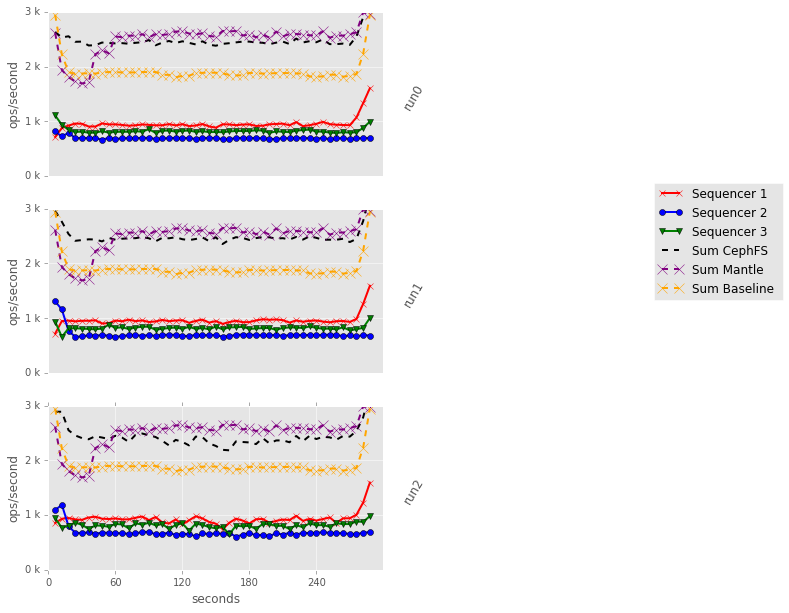

In [67]:
fig = plt.figure(figsize=(6,10))

###
ax = fig.add_subplot(311)
s0, t0, u0, mantle, baseline = graph_it(ax, glob.glob("cephfs-mode0-run0-foreground-*throughput.csv"), "mode0", "run0")

ax = fig.add_subplot(312)
s1, t1, u1, mantle, baseline = graph_it(ax, glob.glob("cephfs-mode0-run1-foreground-*throughput.csv"), "mode0", "run1")

ax = fig.add_subplot(313)
s2, t2, u2, mantle, baseline = graph_it(ax, glob.glob("cephfs-mode0-run2-foreground-*throughput.csv"), "mode0", "run2")

###
ax.set_xlabel("seconds")
ax.set_xticks(range(0, 300, 60))
lgd = ax.legend(loc='center', ncol=1, bbox_to_anchor=(2,2))
#plt.savefig('mantle-balancer-profiles', dpi=300, bbox_inches='tight')

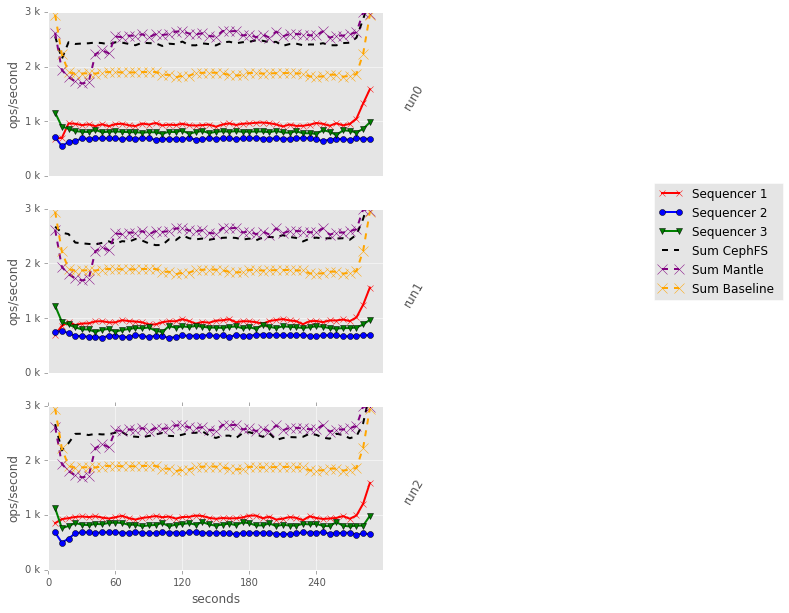

In [68]:
fig = plt.figure(figsize=(6,10))

###
ax = fig.add_subplot(311)
s0m1, t0m1, u0m1, mantle, b = graph_it(ax, glob.glob("cephfs-mode1-run0-foreground-*throughput.csv"), "mode1", "run0")

ax = fig.add_subplot(312)
s1m1, t1m1, u1m1, mantle, b = graph_it(ax, glob.glob("cephfs-mode1-run1-foreground-*throughput.csv"), "mode1", "run1")

ax = fig.add_subplot(313)
s2m1, t2m1, u2m1, mantle, b = graph_it(ax, glob.glob("cephfs-mode1-run2-foreground-*throughput.csv"), "mode1", "run2")

###
ax.set_xlabel("seconds")
ax.set_xticks(range(0, 300, 60))
lgd = ax.legend(loc='center', ncol=1, bbox_to_anchor=(2,2))
#plt.savefig('mantle-balancer-profiles', dpi=300, bbox_inches='tight')

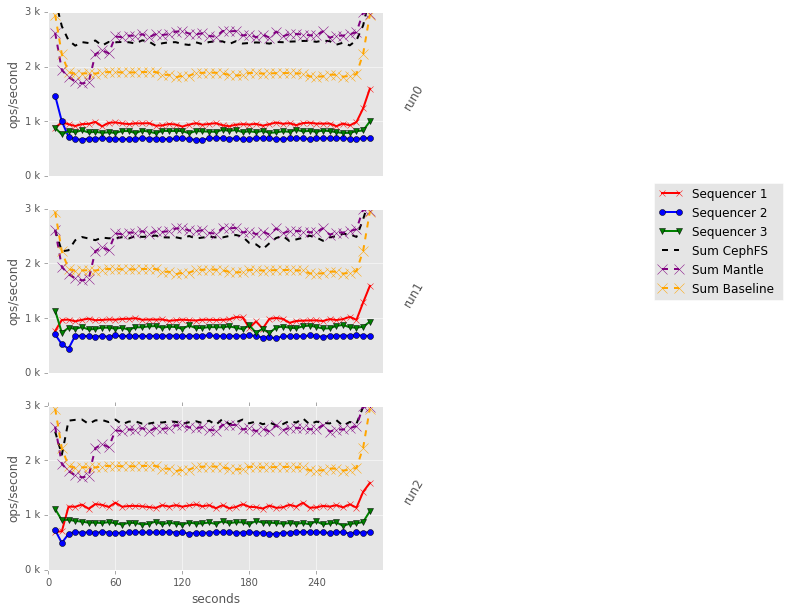

In [83]:
fig = plt.figure(figsize=(6,10))

###
ax = fig.add_subplot(311)
s0m2, t0m2, u0m2, mantle, b = graph_it(ax, glob.glob("cephfs-mode2-run0-foreground-*throughput.csv"), "mode2", "run0")

ax = fig.add_subplot(312)
s1m2, t1m2, u1m2, mantle, b = graph_it(ax, glob.glob("cephfs-mode2-run1-foreground-*throughput.csv"), "mode2", "run1")

ax = fig.add_subplot(313)
s2m2, t2m2, u2m2, mantle, b = graph_it(ax, glob.glob("cephfs-mode2-run2-foreground-*throughput.csv"), "mode2", "run2")

###
ax.set_xlabel("seconds")
ax.set_xticks(range(0, 300, 60))
lgd = ax.legend(loc='center', ncol=1, bbox_to_anchor=(2,2))
#plt.savefig('mantle-balancer-profiles', dpi=300, bbox_inches='tight')

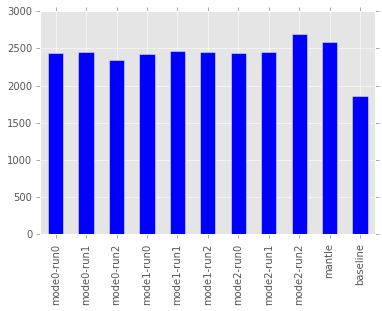

In [84]:
s0.head()

# Get the sum of all the 1 sequencer experiment throughputs
#df = sum_throughput(glob.glob("../../mds-zlog-seq-migrate-redux-baseline/results-singlenode-run0-baseline/singlenode-run0-baseline*throughput.csv"))
#df.columns = ['seconds', 'Baseline']
df = s0 + t0 + u0
df.columns = ['seconds', 'mode0-run0']
s = s1 + t1 + u1
s.columns = ['seconds', 'mode0-run1']
df = pd.concat([df, s['mode0-run1']], axis=1)
s = s2 + t2 + u2
s.columns = ['seconds', 'mode0-run2']
df = pd.concat([df, s['mode0-run2']], axis=1)


s = s0m1 + t0m1 + u0m1
s.columns = ['seconds', 'mode1-run0']
df = pd.concat([df, s['mode1-run0']], axis=1)
s = s1m1 + t1m1 + u1m1
s.columns = ['seconds', 'mode1-run1']
df = pd.concat([df, s['mode1-run1']], axis=1)
s = s2m1 + t2m1 + u2m1
s.columns = ['seconds', 'mode1-run2']
df = pd.concat([df, s['mode1-run2']], axis=1)


s = s0m2 + t0m2 + u0m2
s.columns = ['seconds', 'mode2-run0']
df = pd.concat([df, s['mode2-run0']], axis=1)
s = s1m2 + t1m2 + u1m2zq
s.columns = ['seconds', 'mode2-run1']
df = pd.concat([df, s['mode2-run1']], axis=1)
s = s2m2 + t2m2 + u2m2
s.columns = ['seconds', 'mode2-run2']
df = pd.concat([df, s['mode2-run2']], axis=1)

s = mantle
s.columns = ['seconds', 'mantle']
df = pd.concat([df, s['mantle']], axis=1)

s = baseline
s.columns = ['seconds', 'baseline']
df = pd.concat([df, s['baseline']], axis=1)
baseline.columns = ['seconds', 'baseline']
b = float(baseline.mean())

# Trim off the unstable throughputs
df = df.drop(df.index[range(0, 18)])
df = df.drop(df.index[range(len(df)-5, len(df))])
ax = df.mean().plot.bar()
#ax.set_ylim(0, 2)
